# LDA Model

## Importing Libraries

In [8]:
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Preparing the Data

In [9]:
import pandas as pd

data = pd.read_csv('Company_Dataset/dataset_others.csv')
data.head(3)

,Company,job_name,job_link,ML Labeled Function,city,country,Function,employment_type,remote,seniority level,Job Status,Date Reviewed,data analyst,company_Link,job_location,job_details,job_id,posting_error,description
0,Spectrum,Sr Technical Writer,https://sjobs.brassring.com/TGnewUI/Search/hom...,Other,Englewood,United States,Full-time,No,Mid-Senior Level,to be reviewed,NaN,NaN,NaN,JOB SUMMARYThis position is responsible for de...,4175936f-1a2c-4635-a536-4348d5bf89f5,NaN,https://www.smartrecruiters.com/Humanity/74399...,NaN,NaN
1,Spectrum,Production Specialist I - Spectrum News 13 Orl...,https://sjobs.brassring.com/TGnewUI/Search/hom...,Other,Orlando,United States,Full-time,No,Mid-Senior Level,to be reviewed,NaN,NaN,NaN,"Spectrum Networks is looking for enthusiastic,...",fc34ab5f-ee2d-4145-81c4-126f52b1df35,NaN,https://www.smartrecruiters.com/Humanity/74399...,NaN,NaN
2,Spectrum,"Manager, Advanced Advertising Sales - Ad Sales",https://sjobs.brassring.com/TGnewUI/Search/hom...,Other,Los Angeles,United States,Full-time,No,Mid-Senior Level,to be reviewed,NaN,NaN,NaN,Spectrum Reach is looking for a dynamic Manage...,60391e39-17ba-4de2-a564-ede2412d6791,NaN,https://www.smartrecruiters.com/Humanity/74399...,NaN,NaN


In [10]:
stopwords = stopwords.words("english")
print (stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
data_desc = data['company_Link']
print(data_desc[0])

JOB SUMMARYThis position is responsible for developing and designing complex instructional and informational tools needed to assure safe, appropriate and effective use of engineering technology. Combines multi-media knowledge and strong communication skills with technical expertise to educate across the entire spectrum of users' abilities, technical experience, and visual and auditory capabilities.MAJOR DUTIES AND RESPONSIBILITIESWork closely with the subject matter experts, at all levels within the organization, to record and share technical documentation. Guides partners through discovery conversations to uncover the degree of detail and key information.Document operational procedures, engineering design documents, methods of procedures, implementation guides and engineering drawings.Manage the archiving, tracking and updating of reference materials across multiple media platforms. Responsible for QA, configuration management and version control of all documentationDesign, create mat

**Lemmatization**

In [12]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

data_desc = data_desc.astype('str')
lemmatized_texts = lemmatization(data_desc)
print (lemmatized_texts[0])

position be responsible develop design complex instructional informational tool need assure safe appropriate effective use engineering technology combine multi - media knowledge strong communication skill technical expertise educate entire spectrum user ability technical experience visual auditory capability major duty responsibilitieswork closely subject matter expert level organization record share technical documentation guide partner discovery conversation uncover degree detail key information document operational procedure engineering design document method procedure implementation guide engineering drawing manage archive tracking updating reference material multiple medium platform responsible configuration management version control documentationdesign create material conduct class train other documentation technique practice edit information accuracy readability review content test scenario ensure material be serve intend purpose stay current technical writing editing communica

## Tokenization

In [13]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0])

['position', 'be', 'responsible', 'develop', 'design', 'complex', 'instructional', 'informational', 'tool', 'need', 'assure', 'safe', 'appropriate', 'effective', 'use', 'engineering', 'technology', 'combine', 'multi', 'media', 'knowledge', 'strong', 'communication', 'skill', 'technical', 'expertise', 'educate', 'entire', 'spectrum', 'user', 'ability', 'technical', 'experience', 'visual', 'auditory', 'capability', 'major', 'duty', 'closely', 'subject', 'matter', 'expert', 'level', 'organization', 'record', 'share', 'technical', 'documentation', 'guide', 'partner', 'discovery', 'conversation', 'uncover', 'degree', 'detail', 'key', 'information', 'document', 'operational', 'procedure', 'engineering', 'design', 'document', 'method', 'procedure', 'implementation', 'guide', 'engineering', 'drawing', 'manage', 'archive', 'tracking', 'updating', 'reference', 'material', 'multiple', 'medium', 'platform', 'responsible', 'configuration', 'management', 'version', 'control', 'create', 'material', '

## Bigrams and Trigrams

In [14]:
#Bigrams and trigrams
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=50)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=50)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return(bigram[doc] for doc in texts)

def make_trigrams(texts):
    return(trigram[bigram[doc]] for doc in texts)

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

data_bigrams_trigrams = list(data_bigrams_trigrams)
data_bigrams_trigrams[0]

['position',
 'be',
 'responsible',
 'develop',
 'design',
 'complex',
 'instructional',
 'informational',
 'tool',
 'need',
 'assure',
 'safe',
 'appropriate',
 'effective',
 'use',
 'engineering',
 'technology',
 'combine',
 'multi',
 'media',
 'knowledge',
 'strong',
 'communication',
 'skill',
 'technical',
 'expertise',
 'educate',
 'entire',
 'spectrum',
 'user',
 'ability',
 'technical',
 'experience',
 'visual',
 'auditory',
 'capability',
 'major_duty',
 'closely',
 'subject_matter_expert',
 'level',
 'organization',
 'record',
 'share',
 'technical',
 'documentation',
 'guide',
 'partner',
 'discovery',
 'conversation',
 'uncover',
 'degree',
 'detail',
 'key',
 'information',
 'document',
 'operational',
 'procedure',
 'engineering',
 'design',
 'document',
 'method',
 'procedure',
 'implementation',
 'guide',
 'engineering',
 'drawing',
 'manage',
 'archive',
 'tracking',
 'updating',
 'reference',
 'material',
 'multiple',
 'medium',
 'platform',
 'responsible',
 'configur

## Creating Dictionary

In [15]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

## Calculating the coherence score using C_umass:

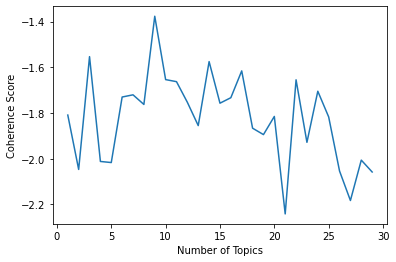

In [18]:
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

topics = []
score = []
for i in range(1,30,1):
    lda_model = LdaMulticore(corpus=corpus, id2word=id2word, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
    topics.append(i)
    score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

## LDA Topic modeling

In [19]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=21,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

## Vizualizing the Data

In [20]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.252049 -0.186485       1        1  15.443540
20     0.184196 -0.333921       2        1  11.728448
13    -0.082906 -0.418679       3        1  10.548113
8     -0.202932 -0.373840       4        1  10.541096
4     -0.438806 -0.224732       5        1   8.238109
12    -0.026861  0.253076       6        1   6.476190
9      0.224137 -0.163186       7        1   5.820531
2      0.386231 -0.258018       8        1   4.210385
5     -0.082000  0.451044       9        1   4.064067
0      0.433659  0.168591      10        1   3.742399
16    -0.241530  0.334915      11        1   3.100219
3      0.135561  0.397508      12        1   2.708597
11    -0.219251  0.045963      13        1   2.538252
7     -0.444964  0.029163      14        1   2.506850
14    -0.286558  0.219416      15        1   2.081111
1      0.372117 -0.027227      16        1   1.915808
18     0.054574 -0.314149      17        1   1.376493
19     0.022622 -0.057479      18        1   1.363518
17     0.260488  0.278609      19        1   1.296583
10     0.157948  0.105400      20        1   0.269448
15     0.046324  0.074030      21        1   0.030242, topic_info=               Term         Freq        Total Category  logprob  loglift
224            team  1524.000000  1524.000000  Default  30.0000  30.0000
7                be  1604.000000  1604.000000  Default  29.0000  29.0000
260          client  1909.000000  1909.000000  Default  28.0000  28.0000
335            sale  1654.000000  1654.000000  Default  27.0000  27.0000
651           datum  1267.000000  1267.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
3522           cool     0.005479     1.034128  Topic21  -8.9251   2.8632
3569  cybersecurity     0.005479     1.034112  Topic21  -8.9251   2.8633
3774  point_contact     0.005479     1.034121  Topic21  -8.9251   2.8633
3811          items     0.005479     1.034112  Topic21  -8.9251   2.8633
3843        written     0.005479     1.034115  Topic21  -8.9251   2.8633

[1143 rows x 6 columns], token_table=      Topic      Freq                  Term
term                                       
0         4  0.201683               ability
0         5  0.148715               ability
0        11  0.515411               ability
0        16  0.059079               ability
0        18  0.073339               ability
...     ...       ...                   ...
108       4  0.144224                  year
108       7  0.490360                  year
108      18  0.014422                  year
108      19  0.032450                  year
2130      5  0.969866  you_aore_comfortable

[1884 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 21, 14, 9, 5, 13, 10, 3, 6, 1, 17, 4, 12, 8, 15, 2, 19, 20, 18, 11, 16])

In [21]:
#saving graph as html
pyLDAvis.save_html(vis, "lda_final.html")